### creating a custom kmeans function and using it for bit compression on images 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


In [50]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=300,random_state=3,centers=4,cluster_std=0.40)
print(X.shape,type(X))
print(X[1])

(300, 2) <class 'numpy.ndarray'>
[0.51830872 3.91238969]


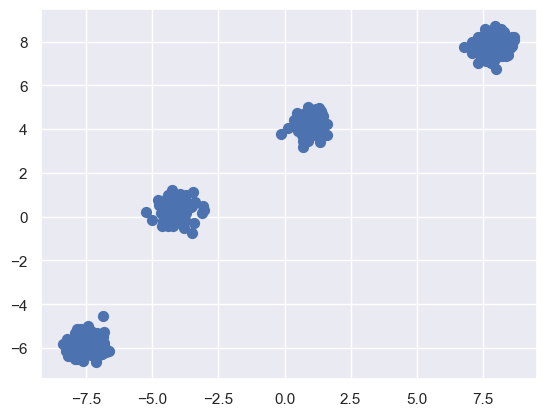

In [51]:
plt.scatter(X[:,0],X[:,1],s=50) # X[:,0] means 1st column 
# it is working cause X is array and it will not work in pandas 
# to work you have to use iloc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


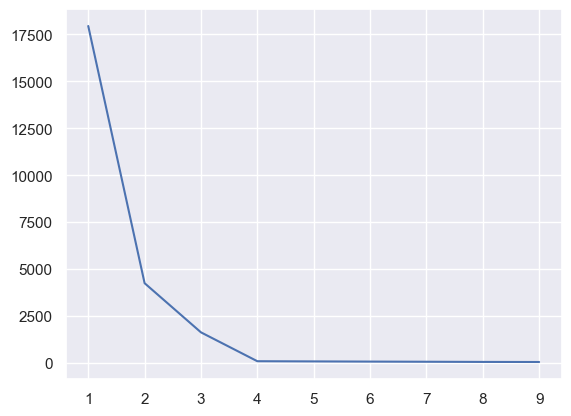

In [52]:
from sklearn.cluster import KMeans
#finding idle n_clusters numbers 
sse=[]
krange=range(1,10)
for i in krange:
    km=KMeans(n_clusters=i)
    km.fit(X)
    sse.append(km.inertia_) #it calculates the sum of square error or variance of each clusters formed 

plt.plot(krange,sse)

well its kinda right if we see the center between two clusters we can see that we can make it work with 2 clusters 

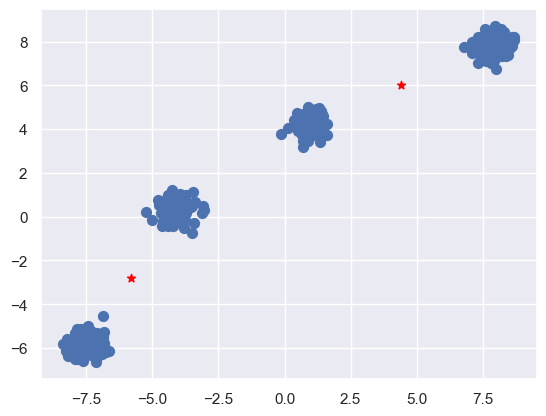

In [53]:
km=KMeans(n_clusters=2)
km.fit(X)
centers=km.cluster_centers_
plt.scatter(X[:,0],X[:,1],s=50)
plt.scatter(centers[:,0],centers[:,1],marker='*',color='red')
y_pred=km.predict(X)


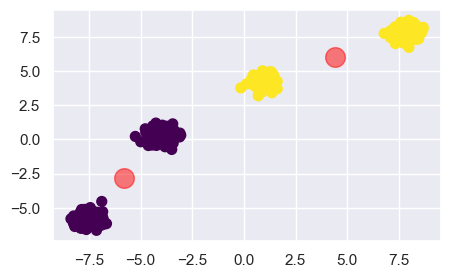

In [54]:
plt.figure(figsize=(5,3))
plt.scatter(X[:,0],X[:,1],c=y_pred,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.5)

### some new functions 

In [8]:
# import things about pairwise_distance)argmin 
'''it returns the labels based on the closet centers 
so if labels between X(8)  and centers(4) means all the values of X 
like X[0] will check all the values of the 4 values of center and
assign the index of that center which is closest to it so lets say 
if center[3] is closest among all the values to the x[0] then it will 
be labelled as X[0]=3''';

In [9]:
'''Sure! Here are some random functions in Python and pandas along with examples:

**Python Random Functions:**
1. `random.random()`: Returns a random float between 0 and 1.
   Example: `random.random()  # Output: 0.573891`

2. `random.randint(a, b)`: Returns a random integer between `a` and `b` (inclusive).
   Example: `random.randint(1, 10)  # Output: 7`

3. `random.choice(seq)`: Returns a random element from the given sequence.
   Example: `random.choice(['apple', 'banana', 'orange'])  # Output: 'banana'`

4. `random.shuffle(seq)`: Shuffles the elements in the given sequence randomly.
   Example: `random.shuffle([1, 2, 3, 4, 5])  # Output: [3, 1, 5, 2, 4]`

**Pandas Random Functions:**
1. `DataFrame.sample(n=None, frac=None, replace=False, random_state=None)`: Returns a random sample of rows from a DataFrame.
   Example: `df.sample(n=5)  # Returns a random sample of 5 rows from DataFrame 'df'`

2. `Series.sample(n=None, frac=None, replace=False, weights=None, random_state=None)`: Returns a random sample of values from a Series.
   Example: `series.sample(n=3)  # Returns a random sample of 3 values from Series 'series'`

These are just a few examples of random functions in Python and pandas. There are many more functions available for generating random numbers and performing random operations.''';

In [10]:
'''When you write `rng.permutation(4)[2]`, it will return the third element of a random permutation of the numbers 0 to 3.

Here is an explanation:

- `rng.permutation(4)`: This function generates a random permutation of the numbers from 0 to 3. For example, it might create permutations like [3, 1, 2, 0] or [2, 0, 3, 1].
- `[2]`: This part of the code accesses the third element of the randomly generated permutation. In Python indexing starts from 0, so `[2]` corresponds to the third element in the array (list).

Example:
If `rng.permutation(4)` generates the permutation [1, 3, 0, 2], then `rng.permutation(4)[2]` will return **0** because 0 is the third element in the permutation list.''';

In [11]:
#permutation function 
rng=np.random.RandomState(2)
print(rng)
i=rng.permutation(4)[:2]
print(i)
i=rng.permutation(8)
print(i)
i=rng.permutation(8)[:4]
print(i)
i=rng.permutation(8)[4]
print(i)
i=rng.permutation(2)[:3] #important
print(i)
print(type(i))

RandomState(MT19937)
[2 3]
[4 1 5 0 7 2 3 6]
[1 4 6 0]
2
[0 1]
<class 'numpy.ndarray'>


### creating custom kmeans function 


In [12]:
from sklearn.metrics import pairwise_distances_argmin

In [13]:
i=rng.permutation(4)[:3]
i

value=X[i]
print(i)
print(type(value),value.ndim)
print(value)
print(type(X),X.ndim)
print(X[:3])
print('showing the difference in brackets',X[1],X[[1]])
label=pairwise_distances_argmin(X[[1]],X)
label=pd.Series(label)
print('distance b/w same X values')
print(label.unique())
rand=np.empty((4,2))
rand[:,0]=(np.random.choice(X[:,0],size=4))
rand[:,1]=(np.random.choice(X[:,1],size=4))
print("rand values ")
print(rand)

label=pairwise_distances_argmin(X,rand)
print(label[:3])

[3 1 0]
<class 'numpy.ndarray'> 2
[[-4.24898466  0.90561978]
 [ 0.51830872  3.91238969]
 [ 1.03597151  4.00108549]]
<class 'numpy.ndarray'> 2
[[ 1.03597151  4.00108549]
 [ 0.51830872  3.91238969]
 [-7.73239393 -5.85265439]]
showing the difference in brackets [0.51830872 3.91238969] [[0.51830872 3.91238969]]
distance b/w same X values
[1]
rand values 
[[-4.22000026 -5.66082637]
 [ 1.34188387  4.70095344]
 [-4.23301004  3.46570004]
 [ 1.23944333  4.93854784]]
[1 1 0]


In [14]:
val=X[[1]]
print(val)
label=[]
print(pairwise_distances_argmin(val,X[[1]]))

[[0.51830872 3.91238969]]
[0]


In [15]:
def find_clusters(X,n_clusters,rseed=2):
    rnd=np.random.RandomState(rseed)
    i=rng.permutation(rseed)[:n_clusters]
    centers=X[i] #means x[[''','',...]] and selecting random values of X
    #centers have arrays of values size equals to n_clusters
    while True:
        label=pairwise_distances_argmin(X,centers)
        new_centers=np.array([X[label==i].mean(0) for i in range(n_clusters)])#selecting labels value
        #mean(0) means axis=0 
        
        #CHECKING THE CONVERGENCE 
        if np.all(centers==new_centers): #all means and 
            break
        centers=new_centers # if not assigning new centers 
    
    return centers,label
    

(300,)
[[ 4.41045307  6.03983671]
 [-5.80532878 -2.8013427 ]]


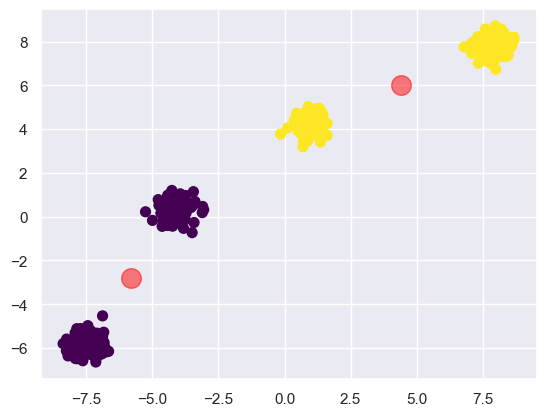

In [16]:
centers,labels=find_clusters(X,2)
print(labels.shape)
print(centers)
plt.scatter(X[:,0],X[:,1],c=y_pred,s=50,cmap='viridis') # c stands for color 
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.5)

In [17]:
##rough work 
rand=np.empty((1,2))
rand[0,0]=np.random.choice(X[:,0])
rand[0,1]=np.random.choice(X[:,1])
l=[]
l.append(rand[0,0])
l.append(rand[0,1])

## color compression 

IMAGE COMPRESSION USING K-MEANS CLUSTERNIG

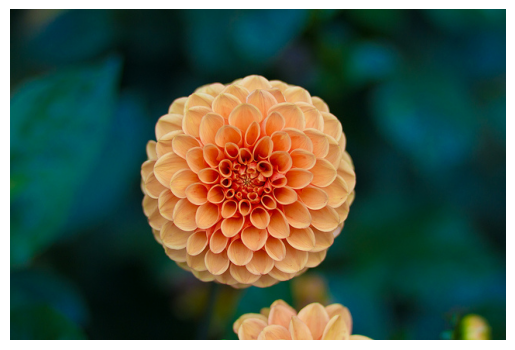

In [18]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
china=load_sample_image('flower.jpg')
plt.axis('off') #shows no grid scales 
plt.imshow(china)

In [19]:
print(china.shape)
print(china.size)
print(china.ndim)
427*640*3

(427, 640, 3)
819840
3


819840

In [20]:
china[1] #means 427 matrix 640 rows and 3 columns

array([[ 1, 18, 12],
       [ 3, 18, 13],
       [ 7, 20, 13],
       ...,
       [ 0, 76, 64],
       [ 1, 74, 65],
       [ 1, 74, 65]], dtype=uint8)

In [21]:
# another exampls
import numpy as np
np.ones((2,3,4))  # representing 3 features for images -> width and height and 3rd is colors used 

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [22]:
w,h,d=china.shape 
#reshaping it 
image_array=china.reshape(w*h,d) #making 2d 
#normalizing it 
image_array=image_array/255 #maximum value of color code
print(image_array.shape)
image_array


(273280, 3)


array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

 The sklearn.utils.shuffle function randomly shuffles the rows of a given dataset along with its corresponding target values (if applicable). This can be useful in scenarios where you want to randomize the order of your data before splitting it into training and testing sets to ensure that the data is not biased based on its original order.



In [23]:
from sklearn.utils import shuffle 
# we are taking small sample for testing and then applying the trained modell to whole sample
image_sample=shuffle(image_array,random_state=2)[:1000]
print(image_sample.size)
image_sample.shape

3000


(1000, 3)

In [24]:
'''we are creating model /cluster and assigning clusters to the pixels ''';

In [25]:
kmean=KMeans(n_clusters=6,random_state=2)
kmean.fit(image_sample)

KMeans(n_clusters=6, random_state=2)

In [26]:
labels=kmean.predict(image_array) #applying to whole sample
print(labels[:4]) #representing which clusters they belong to 
c=kmean.cluster_centers_
c.shape
c

[5 5 5 5]


array([[0.80994256, 0.53951277, 0.29578134],
       [0.00210084, 0.3102441 , 0.33023209],
       [0.02470346, 0.21897846, 0.19737352],
       [0.66486275, 0.23380392, 0.05207843],
       [0.88585928, 0.6904729 , 0.47183391],
       [0.03601148, 0.1219034 , 0.07862267]])

In [27]:
import pandas as pd
lb=pd.Series(labels)
lb.unique()

array([5, 2, 1, 3, 0, 4])

In [28]:
print(c[labels[0]])
print(labels.shape)
print(labels[0])
print(c[labels[130255]])


[0.03601148 0.1219034  0.07862267]
(273280,)
5
[0.66486275 0.23380392 0.05207843]


In [29]:
#recreating org image acc. to labels and each pixels 

def recreate(c,labels,w,h,d):
    image=np.zeros((w,h,d)) # a blank image of same dimension
    label_idx=0
    for i in range(w):
        for j in range(h):
            image[i][j]=c[labels[label_idx]] #c[label==0] doesnt work cause its array
            #filling images according to the clusters center 
            label_idx+=1
            
    
    return(image) #complete image 

In [30]:
'''
labels values will range from 0 to 5 always 
and c[labels] will return the center of the cluster of that particular label
it created 6 bit image as its only has 6 clusters
its looping through rows and assigning each points with clusters value

'''

'\nlabels values will range from 0 to 5 always \nand c[labels] will return the center of the cluster of that particular label\nit created 6 bit image as its only has 6 clusters\nits looping through rows and assigning each points with clusters value\n\n'

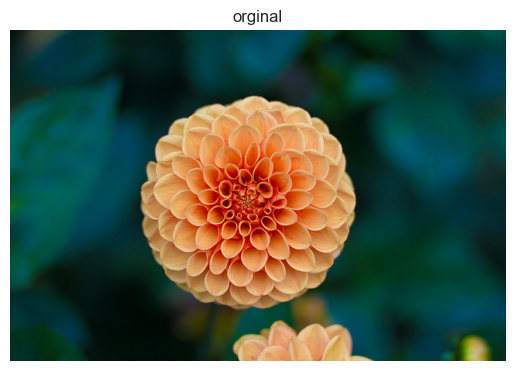

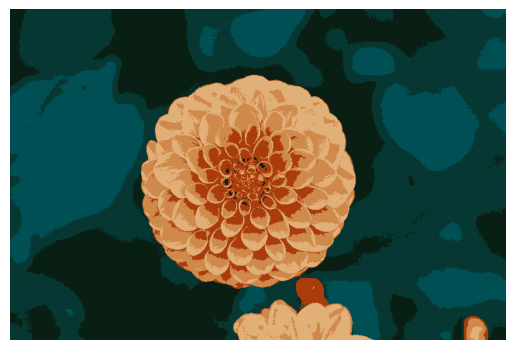

In [31]:
plt.figure(1)
plt.axis('off')
plt.imshow(china)
plt.title('orginal');
plt.figure(2)
plt.axis('off')
plt.imshow(recreate(c,labels,w,h,d))
plt.title('');

(-0.5, 639.5, 426.5, -0.5)

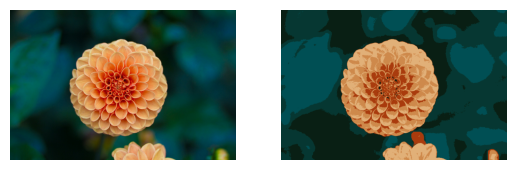

In [32]:

plt.subplot(1,2,1)
plt.imshow(china)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(recreate(c,labels,w,h,d))
plt.axis('off')

In [33]:
val=recreate(c,labels,w,h,d)
val[1] # it means row1 has field with centeroids value accross the columns

array([[0.03601148, 0.1219034 , 0.07862267],
       [0.03601148, 0.1219034 , 0.07862267],
       [0.03601148, 0.1219034 , 0.07862267],
       ...,
       [0.00210084, 0.3102441 , 0.33023209],
       [0.00210084, 0.3102441 , 0.33023209],
       [0.00210084, 0.3102441 , 0.33023209]])